In [1]:
from collections import OrderedDict

from experiments.evaluation_flow.shared import GOOGLENET, RESNET_152, MOBILENET, RESNET_18, RESNET_50, PARAM_UPDATE, PARAM_UPDATE_IMPROVED, PROVENANCE
from experiments.plots.util import *

In [2]:
ROOT_LOG_DIR = '../evaluation_flow/evaluation-flow-results/results'
VERSION = 'version'
FINE_TUNED = 'fine-tuned'
OUTDOOR = 'outdoor'
FOOD = 'food'

In [3]:
# get all file sin the directory
all_files = all_files_in_dir(ROOT_LOG_DIR)
node_server_files = [f for f in all_files if 'server' in f or 'node' in f]
# for all files extract the metadata (e.g. what model and dataset is used)
U_IDS = 'u_ids'

files_and_meta = [(extract_file_meta(f), f) for f in node_server_files]
# add a mapping: use_case -> model id
files_and_meta = [({**f[0], **{U_IDS: use_case_ids(f[1])}}, f[1]) for f in files_and_meta]
# add the parsed events
files_and_meta = [({**f[0], **{EVENTS: parse_events(f[1])}}, f[1]) for f in files_and_meta]

In [4]:
valid_joined = join_server_and_node_meta(files_and_meta)

In [5]:
times = extract_times(valid_joined)

In [6]:
def plot_median_detailed_save_times(data, save_path=None, _rearrange_u2=True):
    x_labels = list(data.keys())
    if _rearrange_u2:
        x_labels = rearrange_u2(x_labels)

    labels = ['pickle parameters', 'hash parameters', 'persist', 'rest']

    transformed_data = []
    for u in x_labels:
        tmp = list(data[u].values())
        tmp[0] = tmp[0] - sum(tmp[1:])

        # rest has to be the last not the first value
        rest = tmp.pop(0)
        tmp.append(rest)


        transformed_data.append(tmp)

    plot_data = np.array(transformed_data).T
    plot_detailed_times(plot_data, labels, x_labels, save_path)

In [7]:

def plot_median_detailed_recover_times(data, save_path=None, ignore_check_env=False, _rearrange_u2=False):
    x_labels = list(data.keys())
    if _rearrange_u2:
        x_labels = rearrange_u2(x_labels)
    labels = ['load', 'recover', 'check weights', 'check env']

    transformed_data = []
    for u in x_labels:
        tmp = list(data[u].values())
        if ignore_check_env:
            tmp = tmp[:3]
            labels = labels[:3]
        transformed_data.append(tmp)

    plot_data = np.array(transformed_data).T

    plot_detailed_times(plot_data, labels, x_labels, save_path)

In [8]:
# BASELINE SAVE TIMES

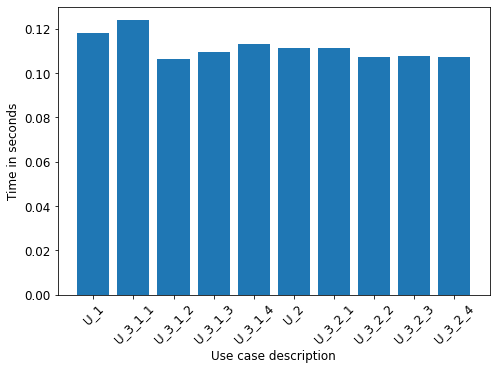

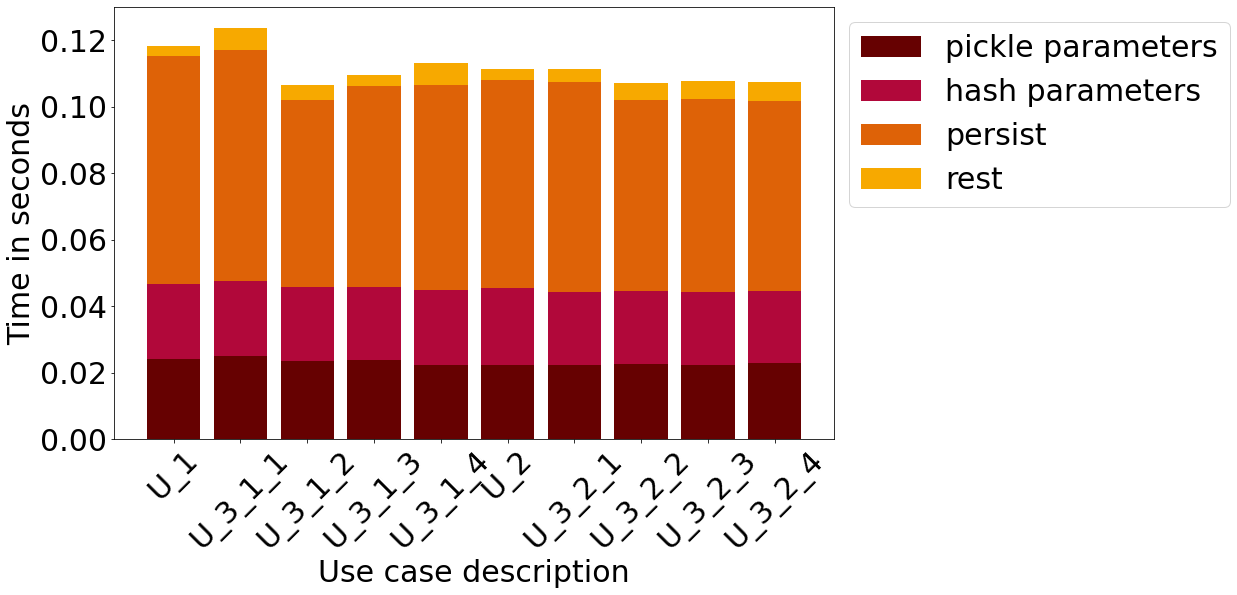

In [9]:
data = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

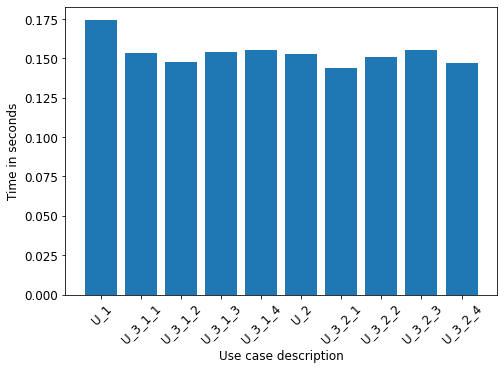

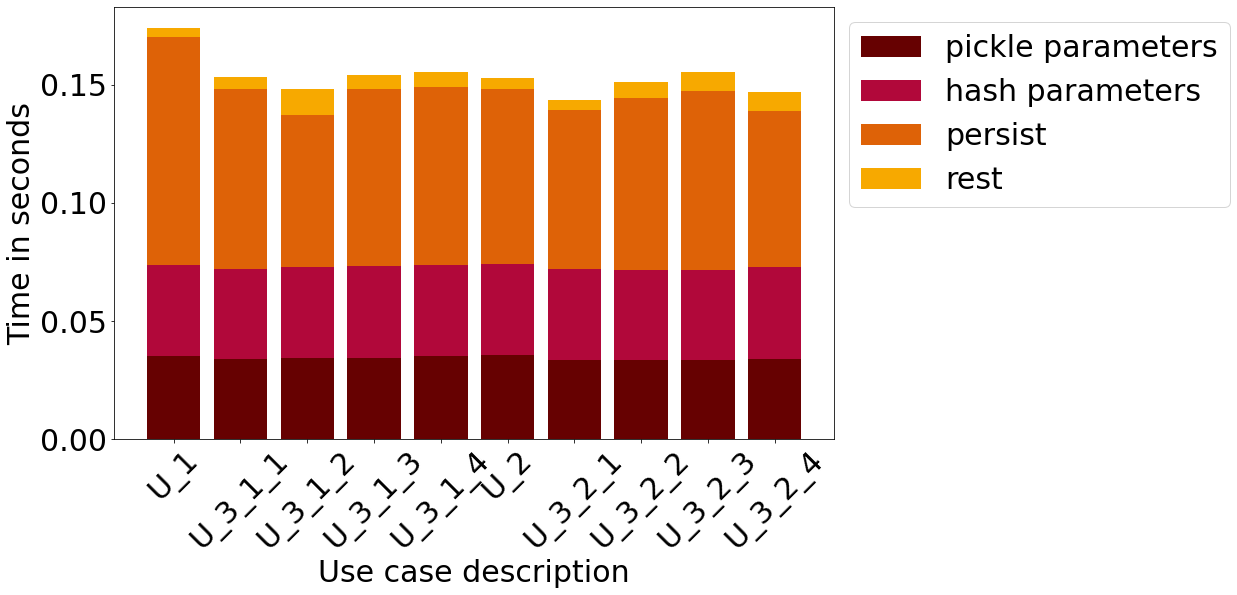

In [10]:
data = filter_meta(times, model=GOOGLENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

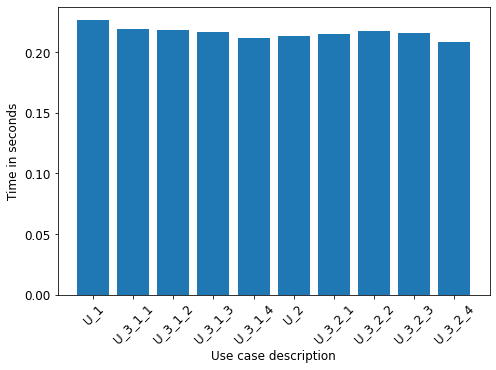

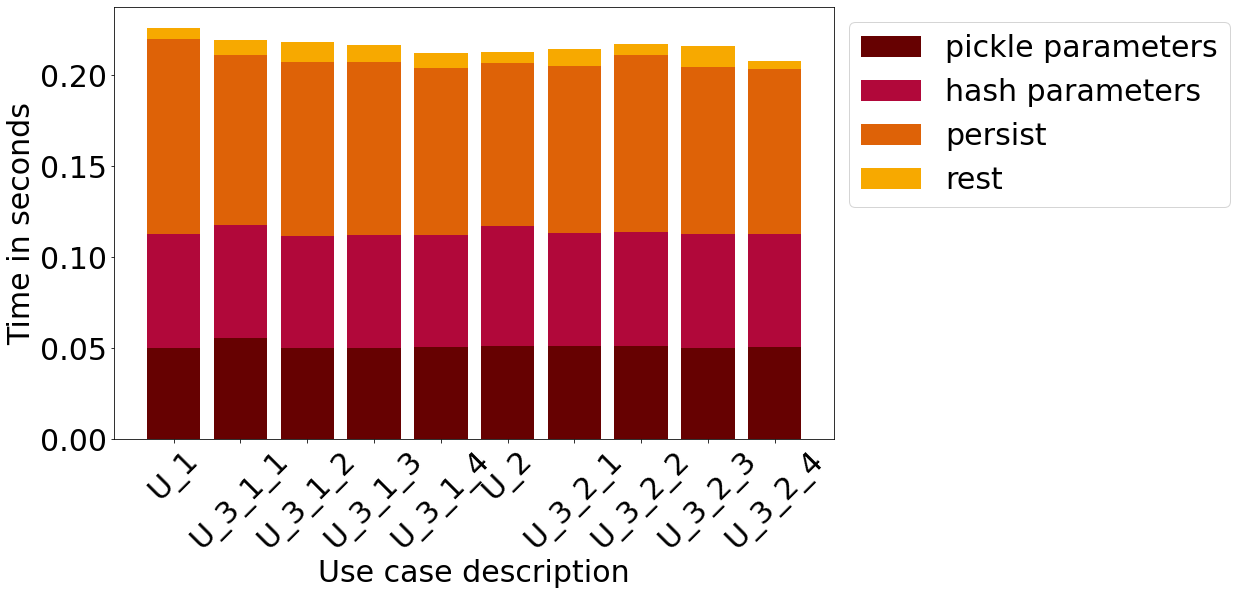

In [11]:
data = filter_meta(times, model=RESNET_18, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

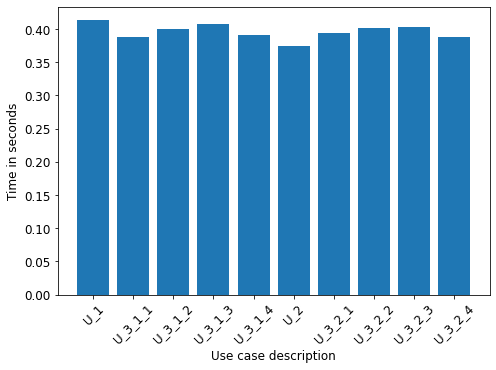

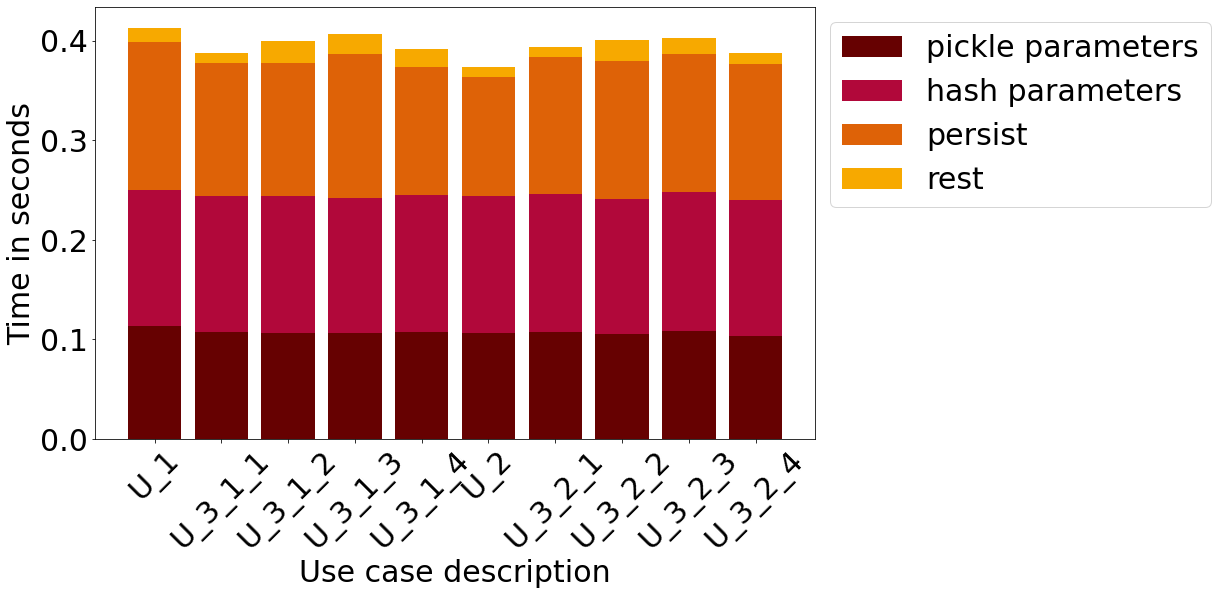

In [12]:
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

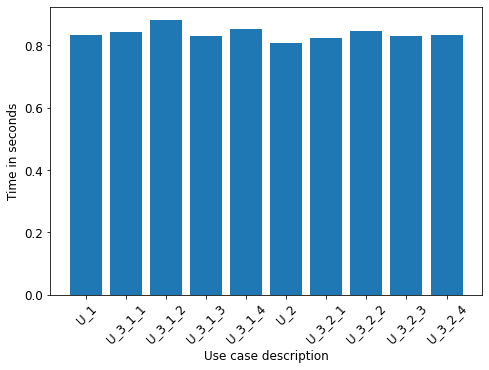

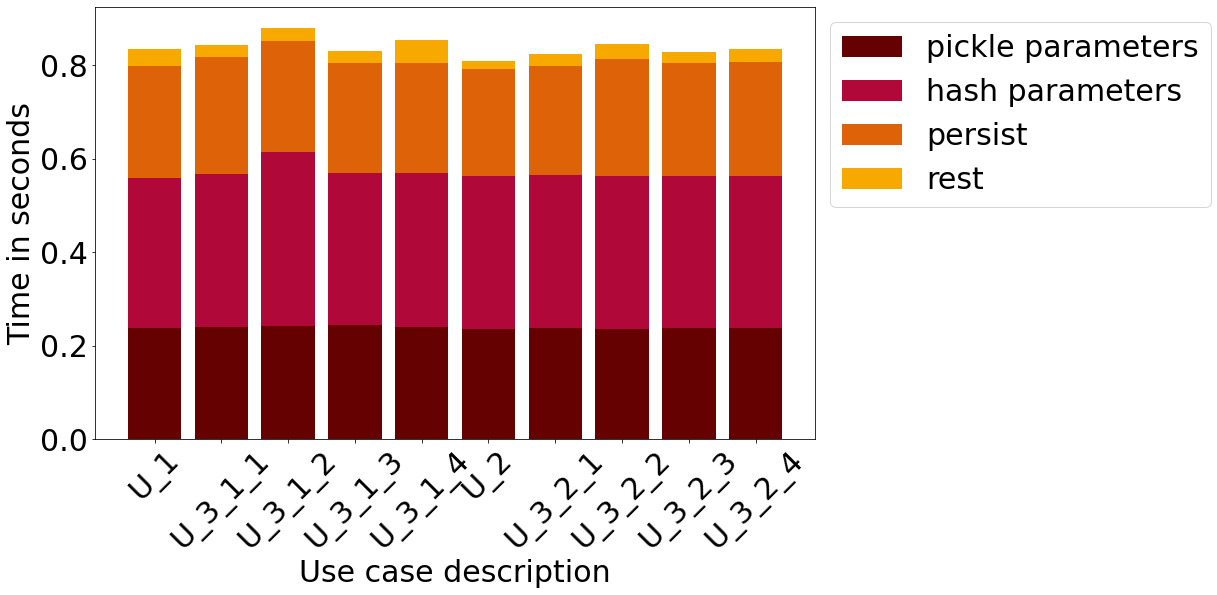

In [13]:
data = filter_meta(times, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

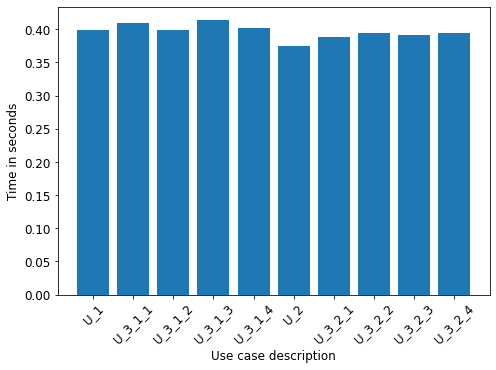

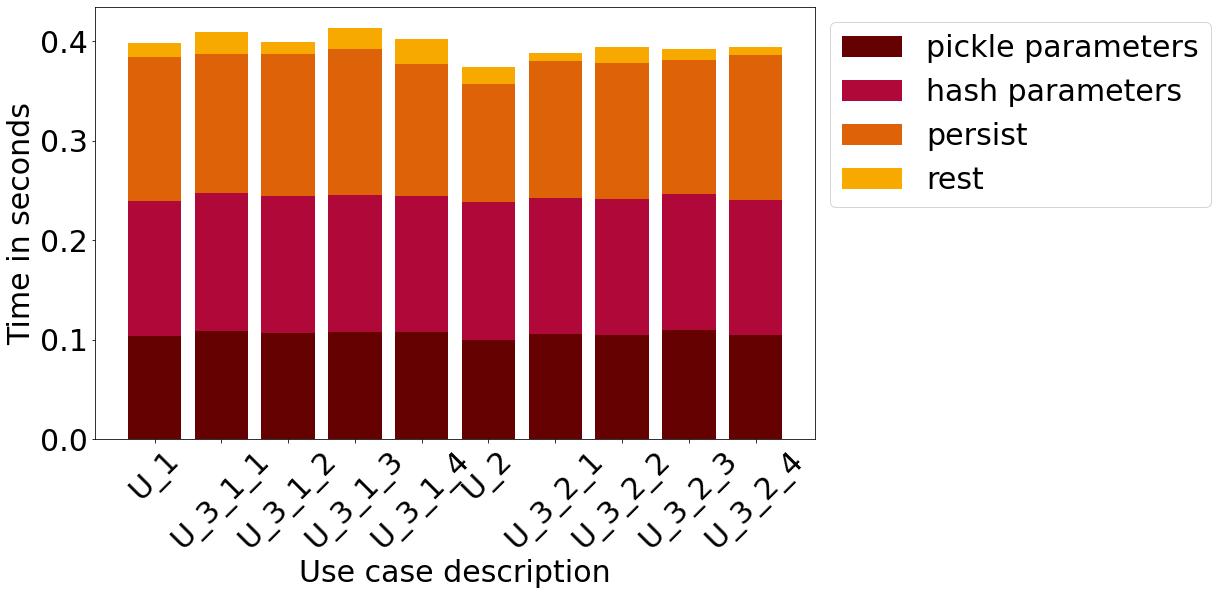

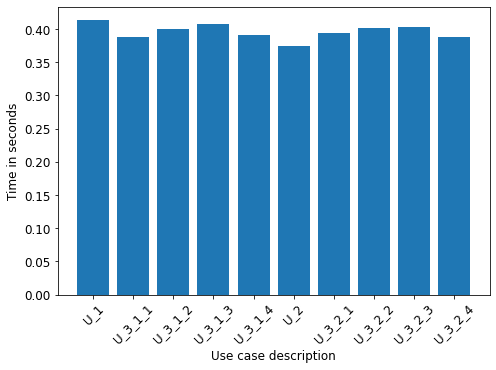

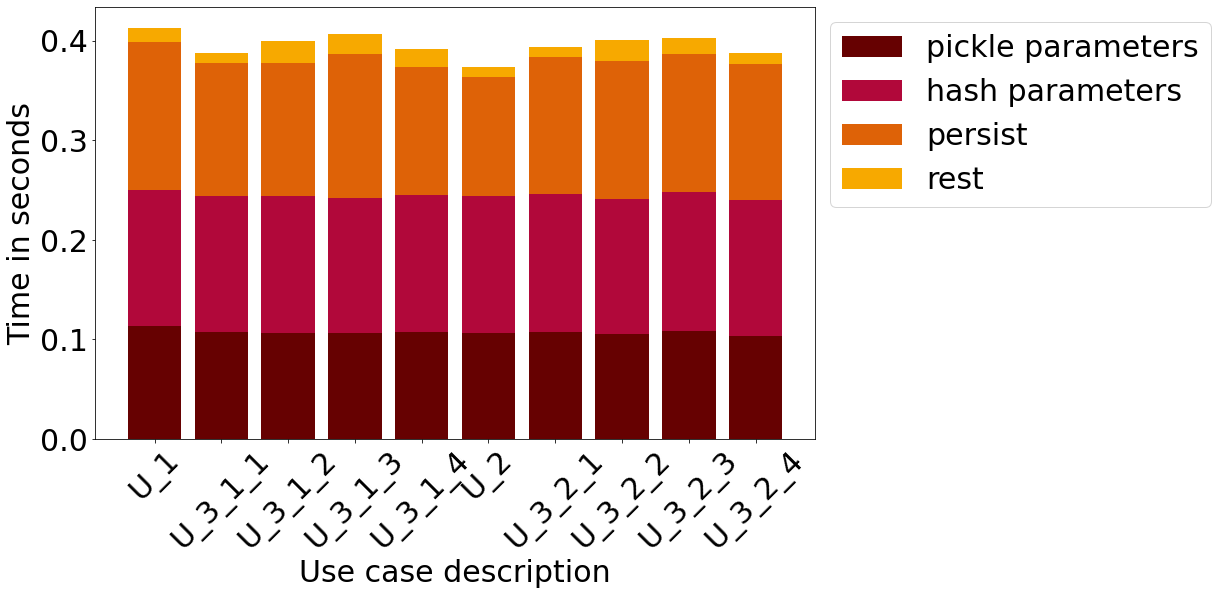

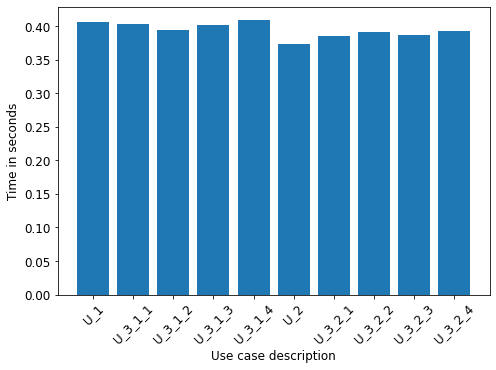

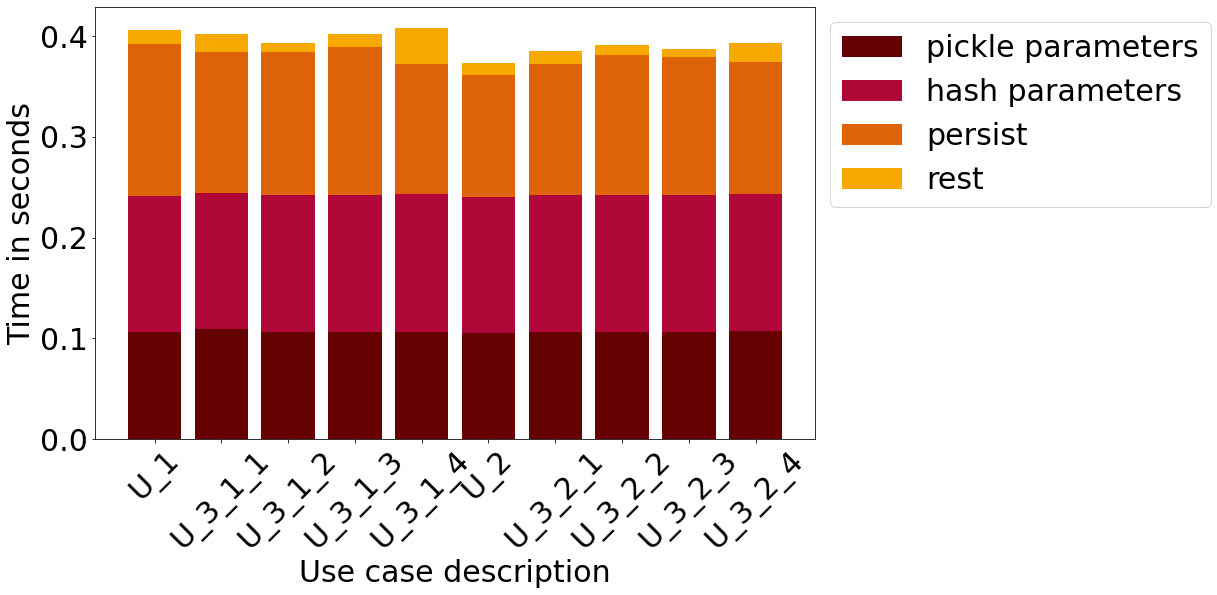

In [14]:
# Save time not dependent on dataset
# AND
# Save time not dependent on version vs fine-tuned
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save, save_path='./saved-plots/baseline/detailed-resnet50-save-time-version-food')

data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save)

data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist=OUTDOOR)
plot_median_high_level_save_time(data)

median_detailed_save = median_detailed_save_times(data)
plot_median_detailed_save_times(median_detailed_save, save_path='./saved-plots/baseline/detailed-resnet50-save-time-finetuned-outdoor')

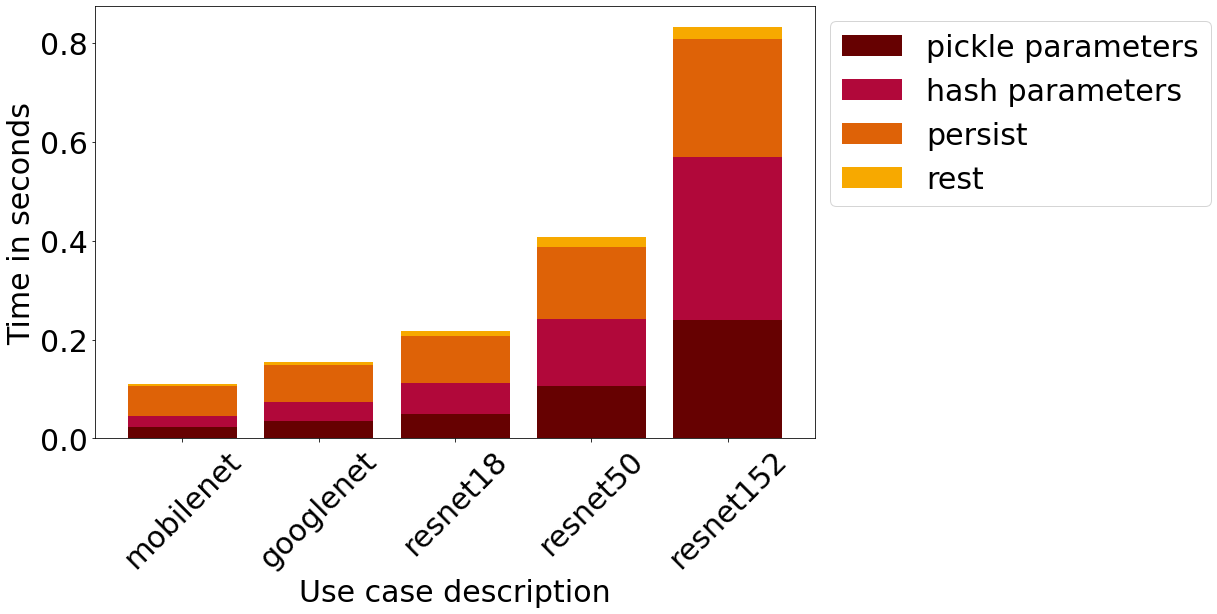

In [15]:
#################################
# All U3_1_3 save times
#################################
models = [MOBILENET, GOOGLENET, RESNET_18, RESNET_50, RESNET_152]
u3_save_times = OrderedDict()
for m in models:
    data = filter_meta(times, model=m, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
    median_detailed_save = median_detailed_save_times(data)

    u3_save_times[m] = median_detailed_save['U_3_1_3']

plot_median_detailed_save_times(u3_save_times, _rearrange_u2=False, save_path='./saved-plots/baseline/detailed-save_times_per_model')

In [16]:
# BASELINE RECOVER TIMES

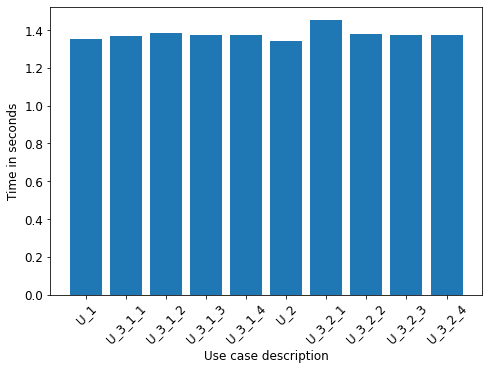

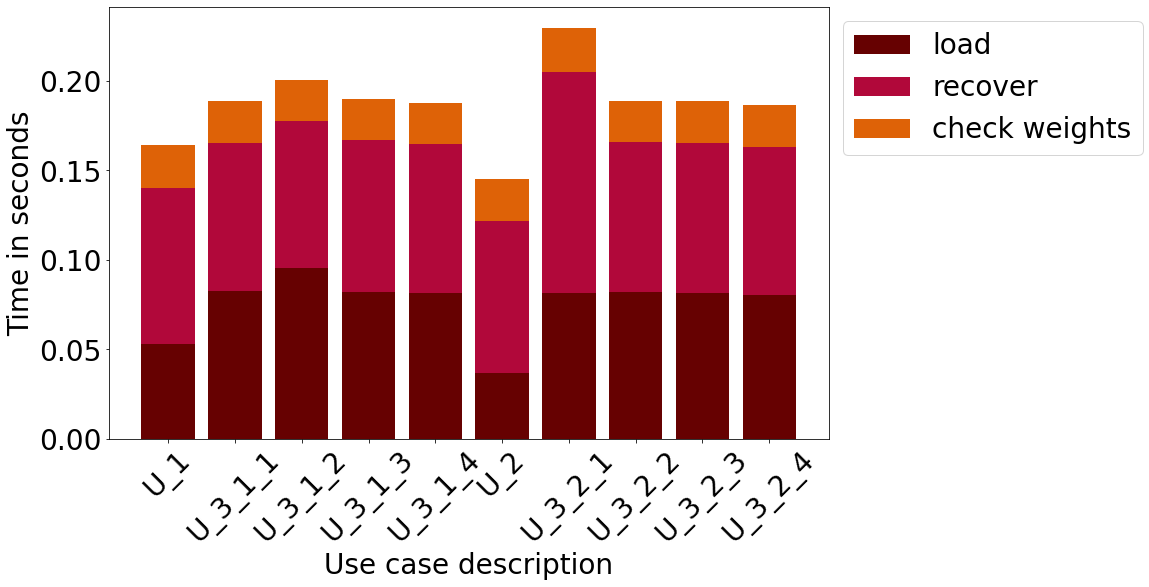

In [17]:
data = filter_meta(times, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover, ignore_check_env=True)

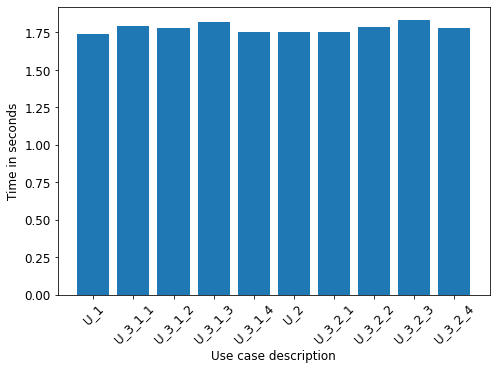

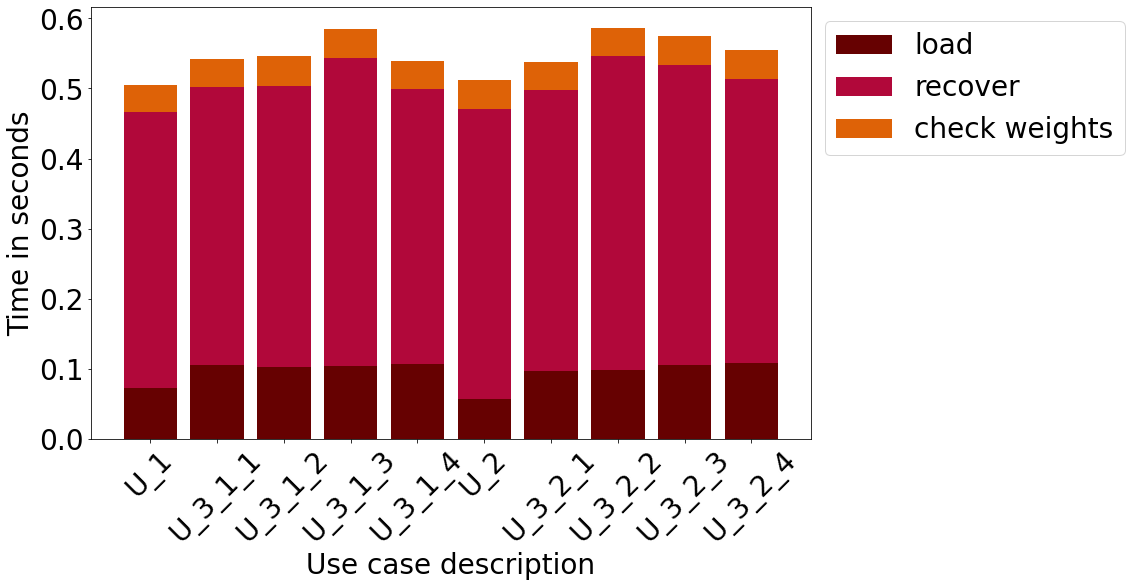

In [18]:
data = filter_meta(times, model=GOOGLENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover, ignore_check_env=True)

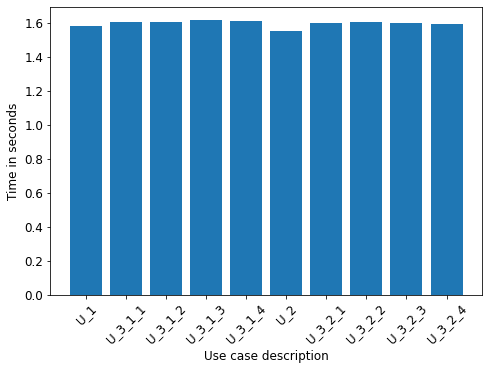

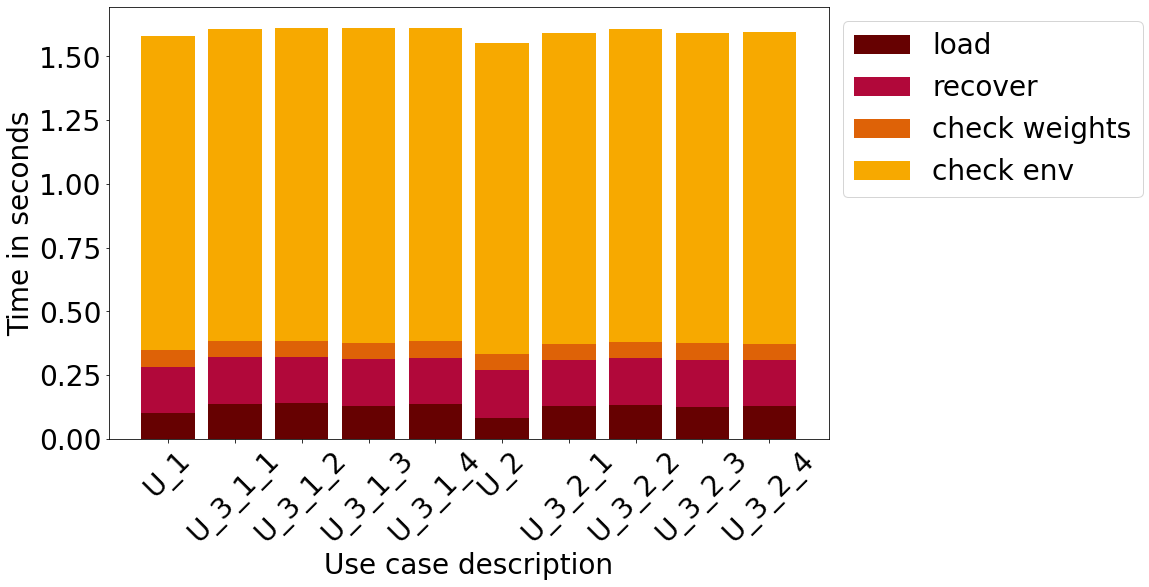

In [19]:
data = filter_meta(times, model=RESNET_18, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

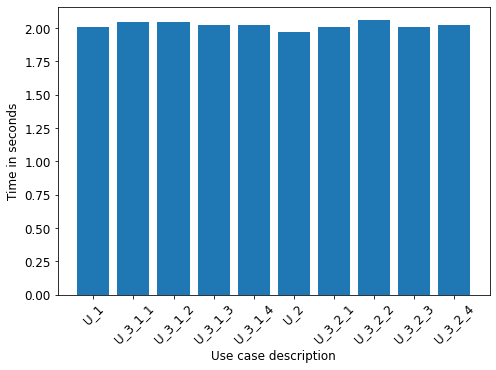

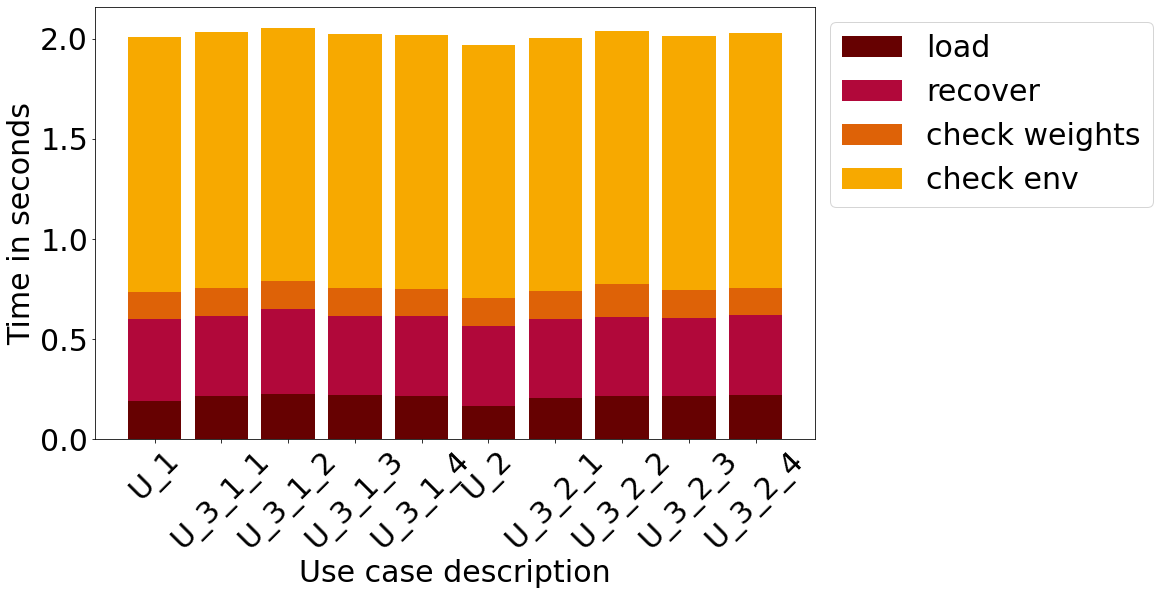

In [16]:
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover, save_path='./saved-plots/baseline/detailed-resnet50-recover-time-version-food')

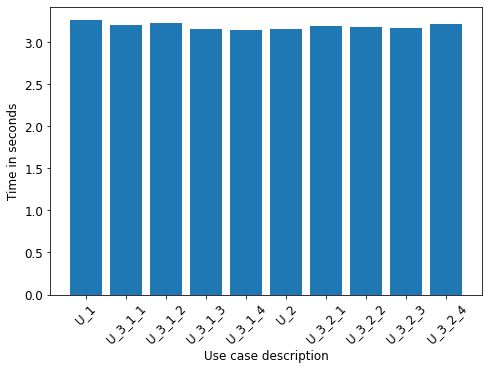

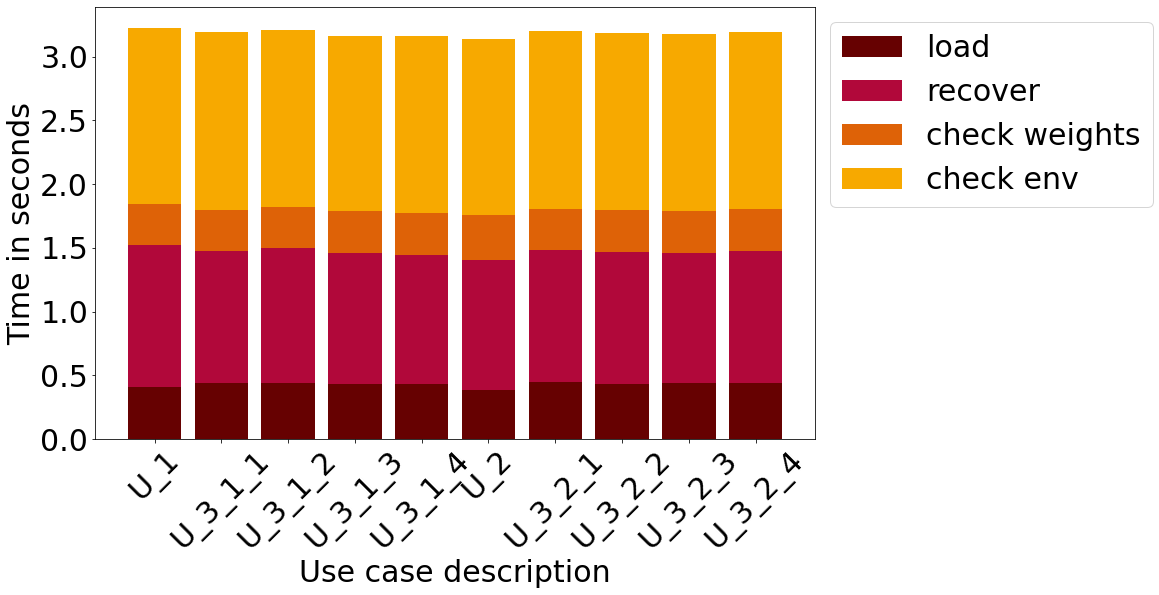

In [17]:
data = filter_meta(times, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=FOOD)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

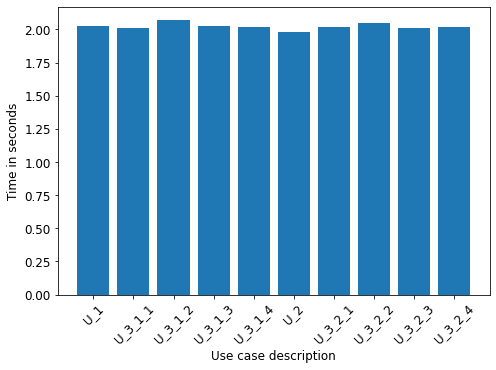

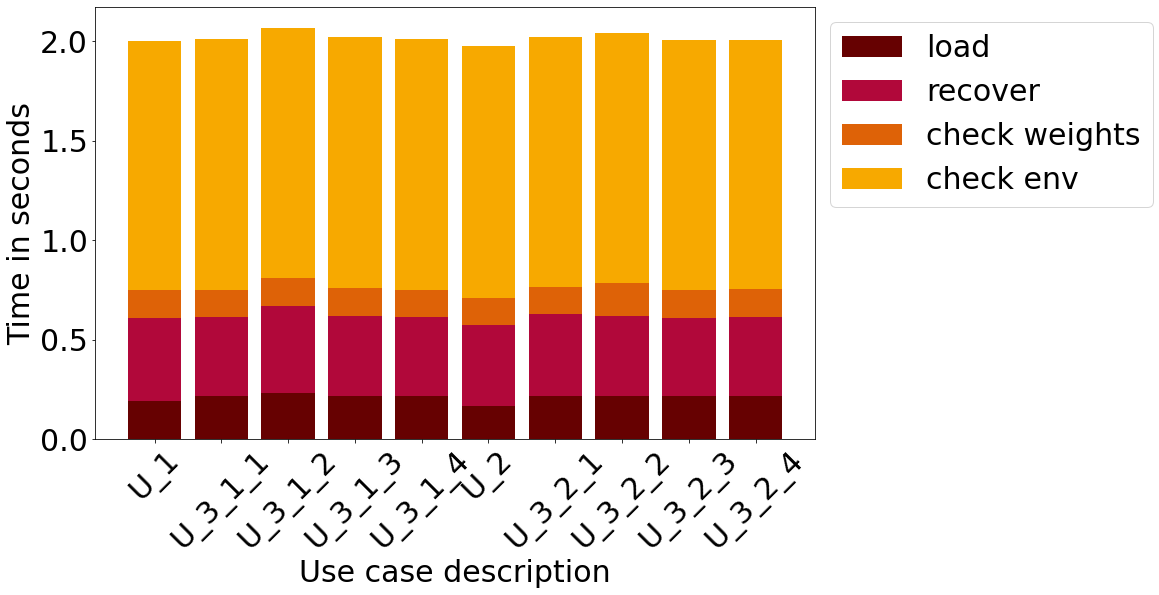

In [18]:
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover)

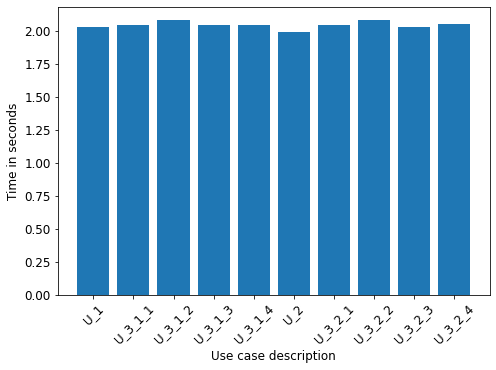

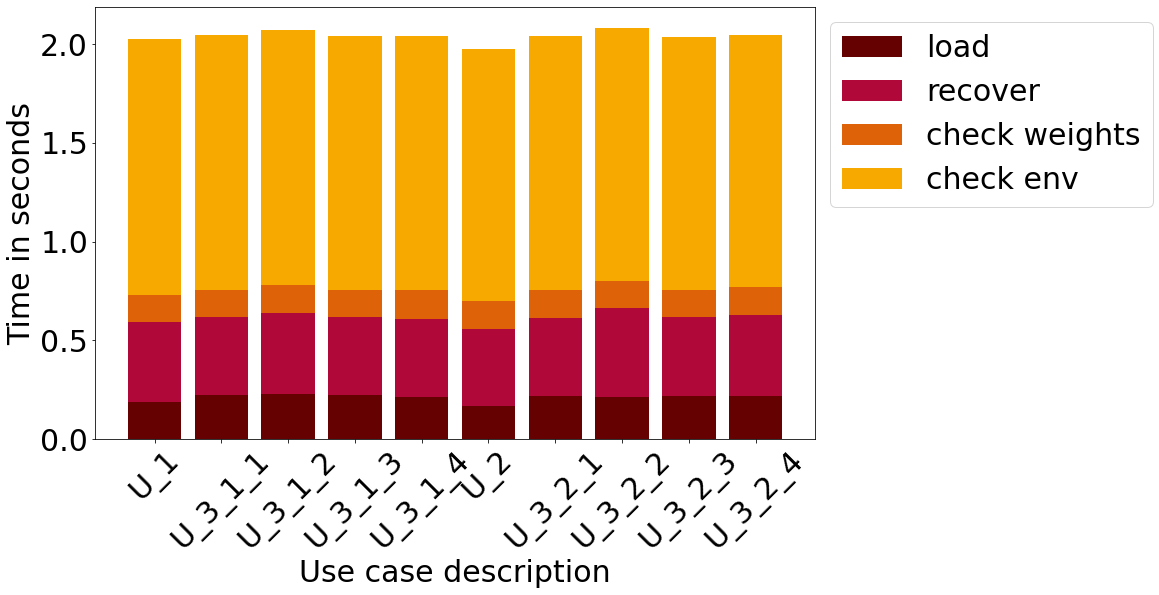

In [19]:
data = filter_meta(times, model=RESNET_50, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist=OUTDOOR)
plot_median_high_level_recover_time(data)
median_detailed_recover = median_detailed_recover_times(data)
plot_median_detailed_recover_times(median_detailed_recover, save_path='./saved-plots/baseline/detailed-resnet50-recover-time-finetuned-outdoor')

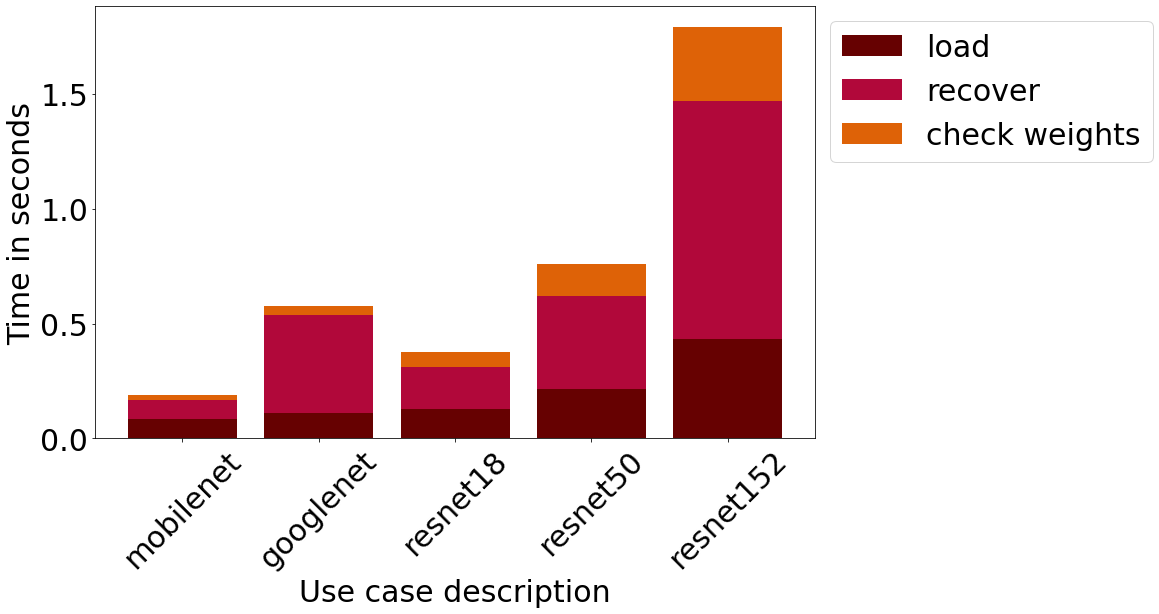

In [20]:
#################################
# All U3_1_3 recover times
#################################
models = [MOBILENET, GOOGLENET, RESNET_18, RESNET_50, RESNET_152]
u3_recover_times = OrderedDict()
for m in models:
    data = filter_meta(times, model=m, approach=BASELINE, snapshot_type=VERSION, snapshot_dist=OUTDOOR)
    median_detailed_recover = median_detailed_recover_times(data)

    u3_recover_times[m] = median_detailed_recover['U_3_1_3']

plot_median_detailed_recover_times(u3_recover_times, ignore_check_env=True, _rearrange_u2=False, save_path='./saved-plots/baseline/detailed-recover_times_per_model')